# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [303]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources\city_data.csv"
ride_data_to_load = "Resources\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

display(city_data_df.head())
display(ride_data_df.head())

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [304]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [305]:
city_data_df.groupby(["type"])

In [306]:
# 1. Get the total rides for each city type
label='ride_id'
df=pyber_data_df.groupby(["type"]).count()[label]
urban_ride_count = df['Urban']
suburban_ride_count = df['Suburban']
rural_ride_count = df['Rural']
total_rides_by_type=(rural_ride_count,suburban_ride_count,urban_ride_count)
print(f"(Rural, Suburban, Urban) total rides = {total_rides_by_type}")

# 2. Get the total drivers for each city type
label='driver_count'
df=city_data_df.groupby(["type"]).sum()[label]
urban_driver_count = df['Urban']
suburban_driver_count = df['Suburban']
rural_driver_count = df['Rural']
drivers_by_type=(rural_driver_count,suburban_driver_count,urban_driver_count)
print(f"(Rural, Suburban, Urban) drivers = {drivers_by_type}")

#  3. Get the total amount of fares for each city type
label='fare'
df=pyber_data_df.groupby(["type"]).sum()[label]
urban_fare_total = df['Urban']
suburban_fare_total = df['Suburban']
rural_fare_total = df['Rural']
fare_total_by_type=(rural_fare_total,suburban_fare_total,urban_fare_total)
print(f"(Rural, Suburban, Urban) fare totals = {fare_total_by_type}")

#  4. Get the average fare per ride for each city type. 
urban_fare_avg=(urban_fare_total*1.0) / urban_ride_count
suburban_fare_avg=suburban_fare_total / suburban_ride_count
rural_fare_avg=rural_fare_total / rural_ride_count
fare_avg_by_type=(rural_fare_avg,suburban_fare_avg,urban_fare_avg)
print(f"(Rural, Suburban, Urban) fare avgs = {fare_avg_by_type}")

# 5. Get the average fare per driver for each city type. 
urban_fare_perDriver=(urban_fare_total*1.0) / urban_driver_count
suburban_fare_perDriver=(suburban_fare_total*1.0) / suburban_driver_count
rural_fare_perDriver=(rural_fare_total*1.0) / rural_driver_count
fare_avg_by_type_perDriver=(rural_fare_perDriver,suburban_fare_perDriver,urban_fare_perDriver)
print(f"(Rural, Suburban, Urban) fare per Driver = {fare_avg_by_type_perDriver}")


(Rural, Suburban, Urban) total rides = (125, 625, 1625)
(Rural, Suburban, Urban) drivers = (78, 490, 2405)
(Rural, Suburban, Urban) fare totals = (4327.930000000002, 19356.330000000013, 39854.380000000085)
(Rural, Suburban, Urban) fare avgs = (34.623440000000016, 30.97012800000002, 24.52577230769236)
(Rural, Suburban, Urban) fare per Driver = (55.48628205128208, 39.50271428571431, 16.57146777546781)


In [307]:
# 6. Create data frame
pyber_summary_df=pd.DataFrame()
pyber_summary_df['type']=('Rural','Suburban','Urban')
pyber_summary_df['Total Rides']=total_rides_by_type
pyber_summary_df['Total Drivers']=drivers_by_type
pyber_summary_df['Total Fares']=fare_total_by_type
pyber_summary_df['Average Fare per Ride']=fare_avg_by_type
pyber_summary_df['Average Fare per Driver']=fare_avg_by_type_perDriver

#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

#  8. Format the columns.
columns=('Total Fares','Average Fare per Ride','Average Fare per Driver')
for column in columns:
    pyber_summary_df[column]=pyber_summary_df[column].map("${:.2f}".format)

pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,$4327.93,$34.62,$55.49
1,Suburban,625,490,$19356.33,$30.97,$39.50
2,Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [308]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [309]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# Create a data frame where the date column only has the day (not time)
columnNames=('date','city','fare','type')
pyber_data_day_df=pd.DataFrame(columns=columnNames)
for row in pyber_data_df.iterrows():
    index=row[0]
    data=row[1]
    date=data['date'].split()[0]
    pyber_data_day_df.loc[index]=[date,data['city'],data['fare'],data['type']]
#print(pyber_data_day_df.head())

# Now group the new data frame by date and type
fare_total_type_date_df=pyber_data_day_df.groupby(['date','type']).sum('fare')
print(fare_total_type_date_df)

                       fare
date       type            
2019-01-01 Rural      43.69
           Suburban  128.52
           Urban     127.78
2019-01-02 Rural      52.12
           Suburban  274.92
...                     ...
2019-05-06 Urban     181.20
2019-05-07 Rural      44.94
           Suburban  274.09
           Urban     258.01
2019-05-08 Urban     170.82

[334 rows x 1 columns]


In [310]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_total_type_date_df=fare_total_type_date_df.reset_index().set_index('date',drop=True)
fare_total_type_date_df.head()


,type,fare
date,,
2019-01-01,Rural,43.69
2019-01-01,Suburban,128.52
2019-01-01,Urban,127.78
2019-01-02,Rural,52.12
2019-01-02,Suburban,274.92


In [311]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_total_pivot=pd.pivot_table(fare_total_type_date_df,index='date',values='fare',columns='type')
fare_total_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [312]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_total_jan_april=fare_total_pivot.loc['2019-01-01':'2019-04-29']
fare_total_jan_april



type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [313]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_total_jan_april.index=pd.to_datetime(fare_total_jan_april.index)
# 7. Check that the datatype for the index is datetime using df.info()
fare_total_jan_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [314]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_weekly_totals=fare_total_jan_april.resample('W-Mon').sum()
fare_weekly_totals

type,Rural,Suburban,Urban
date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
2019-02-11,81.91,879.92,2200.85
2019-02-18,140.52,1394.86,2389.68
2019-02-25,448.07,1067.99,2156.88
2019-03-04,75.65,836.61,2619.82


Text(0, 0.5, 'Fare($USD)')

<Figure size 1080x432 with 0 Axes>

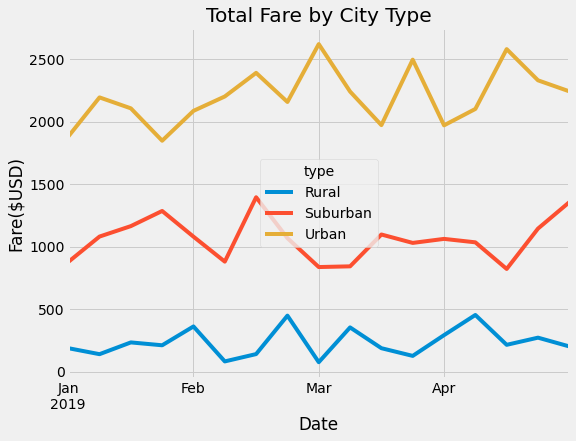

In [373]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig=plt.figure(figsize=(15,6))

fare_weekly_totals.plot(kind='line',figsize=(8,6))
plt.title("Total Fare by City Type")
plt.xlabel("Date")
plt.ylabel("Fare($USD)")
